****Implementation of linear regression on diabetes dataset****

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_diabetes

In [7]:
df=load_diabetes()
df

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [9]:
dataset=pd.DataFrame(df.data)
dataset

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [11]:
dataset.columns=df.feature_names
dataset.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [12]:
## independent and dependent features
X=dataset
y=df.target #output

In [13]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [37]:
## train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42)
X_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
225,0.030811,0.050680,0.032595,0.049415,-0.040096,-0.043589,-0.069172,0.034309,0.063015,0.003064
412,0.074401,-0.044642,0.085408,0.063187,0.014942,0.013091,0.015505,-0.002592,0.006207,0.085907
118,-0.056370,0.050680,-0.010517,0.025315,0.023198,0.040022,-0.039719,0.034309,0.020609,0.056912
114,0.023546,-0.044642,0.110198,0.063187,0.013567,-0.032942,-0.024993,0.020655,0.099241,0.023775
364,0.001751,0.050680,-0.006206,-0.019442,-0.009825,0.004949,-0.039719,0.034309,0.014821,0.098333
...,...,...,...,...,...,...,...,...,...,...
106,-0.096328,-0.044642,-0.076264,-0.043542,-0.045599,-0.034821,0.008142,-0.039493,-0.059471,-0.083920
270,0.005383,0.050680,0.030440,0.083844,-0.037344,-0.047347,0.015505,-0.039493,0.008641,0.015491
348,0.030811,-0.044642,-0.020218,-0.005670,-0.004321,-0.029497,0.078093,-0.039493,-0.010903,-0.001078
435,-0.012780,-0.044642,-0.023451,-0.040099,-0.016704,0.004636,-0.017629,-0.002592,-0.038460,-0.038357


In [39]:
# ## standardizing the datasets
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # fit on training data
X_test = scaler.transform(X_test)        # transform test data
# scaler.inverse_transform(X_train)

array([[ 6.42054387e-01,  1.05661647e+00,  6.19059528e-01, ...,
         6.76301514e-01,  1.27560982e+00, -2.79646760e-04],
       [ 1.58492079e+00, -9.46417203e-01,  1.71984406e+00, ...,
        -8.48887236e-02,  8.94884476e-02,  1.72793733e+00],
       [-1.24367842e+00,  1.05661647e+00, -2.79540092e-01, ...,
         6.76301514e-01,  3.90205997e-01,  1.12306139e+00],
       ...,
       [ 6.42054387e-01, -9.46417203e-01, -4.81725006e-01, ...,
        -8.46078961e-01, -2.67756388e-01, -8.66904956e-02],
       [-3.00812016e-01, -9.46417203e-01, -5.49119978e-01, ...,
        -8.48887236e-02, -8.43116611e-01, -8.64388135e-01],
       [-2.02940042e+00, -9.46417203e-01,  5.29199566e-01, ...,
        -8.46078961e-01, -1.47469368e-01, -8.66904956e-02]])

In [41]:
from sklearn.linear_model import LinearRegression #multiple linear regression problem
#cross validation
from sklearn.model_selection import cross_val_score

In [53]:
regression= LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [49]:
mse=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)

In [50]:
np.mean(mse)

np.float64(-3167.8616313016096)

In [55]:
## prediction
reg_pred=regression.predict(X_test)

In [56]:
reg_pred

array([138.46970031, 181.10052342, 125.34400904, 292.75977277,
       123.8830531 ,  91.89830434, 257.26463123, 177.76169318,
        84.98549706, 109.15960992,  94.4855284 , 166.13235108,
        57.40742502, 206.13897354,  97.7811842 , 131.00472765,
       214.29789972, 252.52907661, 199.66656381, 219.49985634,
       203.23671317,  88.00656925,  70.65108459, 186.92233427,
       155.81266751, 162.81022205, 191.93135706, 184.72924276,
        46.62920829, 108.26566599, 178.14743952,  91.35065005,
       127.72125745, 184.04205666, 172.23799897, 189.51548863,
       121.83265708, 117.75339206, 145.67950306,  58.57563401,
        72.55421321, 107.27571105, 166.15280313, 153.29339984,
       165.19282154,  62.95752038,  73.58909449, 110.05656189,
        54.49723354, 164.88920632, 152.49472803,  63.8874565 ,
       111.4354561 , 108.34936269, 179.96973311, 158.70054112,
        95.04833555, 209.68990406, 118.37356519,  69.69946093,
       189.04680627, 204.99138626, 140.26840176, 105.75

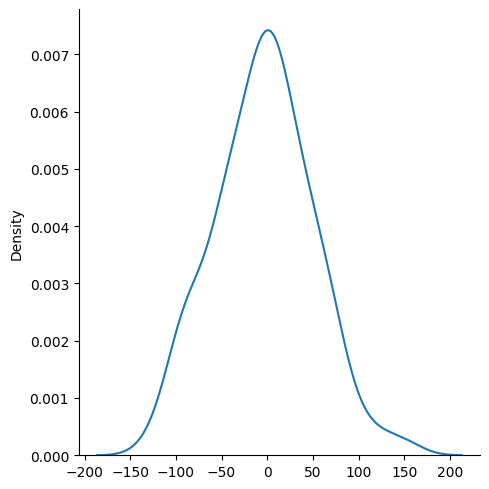

In [59]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')
# plt.show()

In [60]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.4772897164322617